생선 분류 문

도미 데이터 준비하기

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
print(len(bream_length))
# print(shape(bream_length))

35


산점도 (scatter plot)

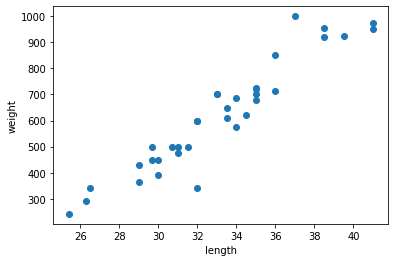

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

빙어 데이터 준비

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
print(len(smelt_length))

14


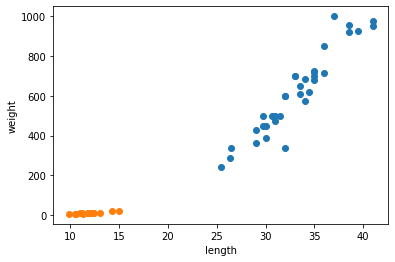

In [ ]:
plt.scatter(bream_length, bream_weight) # 도미 scatter
plt.scatter(smelt_length, smelt_weight) # 빙어 scatter
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

도미와 빙어 합치기
첫 번째 머신러닝 프로그램

In [ ]:
length = bream_length+smelt_length # 연산자 overloading 두개의 리스트를 합치는 것
weight = bream_weight+smelt_weight # 도미 35개의 길이와 빙어 14개의 길이 , 무게 합침

사이킷런이 기대하는 데이터 형태는 [[A, B]]의 2차원 배열을 원함
리스트 내포라는 방법을 사용해야함

In [ ]:
fish_data = [[l, w] for l, w in zip(length, weight)] # 리스트 안에 for문이 있는 리스트 내포

print(fish_data)

fish_target = [1]*35 + [0]*14 # 리스트 타입으로 1이 35개, 0이 14개 -> 지도학습

print(fish_target) # 이진 분류

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


K- 최근접 이웃

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 클래스의 객체 데이터 만들기

# fit은 학습 모델
kn.fit(fish_data, fish_target) # fit mehtod 머신러닝, (fish_data)와 (fish_target)으로 데이터를 학습함

# socre는 평가
kn.score(fish_data, fish_target) # 정답 1.0으로 나옴

1.0

새로운 생선 예측

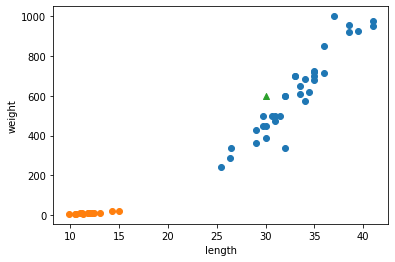

array([1])

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# predict는 새로운 데이터를 추가해서 학습 모델에 넣어 얼마나 잘되는지 확인할 때
kn.predict([[30,600]]) # 프리딕트 메소드에 2차원 리스트 배열로 # 길이 30cm, 무게: 600g 넣음

# array([1]) # numpy이므로

무조건 도미

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 도미랑 빙어 데이터 49개 중 다수는 도미이므로 무조건 도미라고 생각함

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143


In [ ]:
print(35/49)

0.7142857142857143


훈련 세트와 테스트 세트

In [ ]:
train_input = fish_data[:35]      # 35개의 도미 데이터 선택 [0] ~ [34]
train_target = fish_target[:35]   # 35개의 도미 점수 선택
print(train_input)

test_input = fish_data[35:]       # 14개의 빙어 데이터 선택 [35] ~ [end]
test_target = fish_target[35:]

a= [5, 6, 7, 8]
print(a[3:])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0]]
[8]


In [ ]:
kn = KNeighborsClassifier() # 객체 초기화
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) 
# 훈련 데이터와 테스트 데이터가 다르니까 0점이 나옴

0.0

넘파이 사용하기

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(fish_data)
print(input_arr)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700.

데이터 섞기

In [ ]:
index = np.arange(49)
print(index)
np.random.shuffle(index)
print(index)
# 0 ~ 48까지 index로 랜덤하게 섞음
train_input = input_arr[index[:35]]     # 훈련 세트 35개
train_target = target_arr[index[:35]]
print(train_input)
test_input = input_arr[index[35:]]      # 테스트 세트 14개
test_target = target_arr[index[35:]]

#a = np.array([5, 6, 7, 8])
#print(a[[1,3]])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[ 5 30 47 25 11 28 44 33 36 16 42 15  7 26 31 45 20 19  6  1 10 40 13 43
 39  2 48 35  0 27 23 18 14 22 24  4 38 12 46 32  8 41 34 21 17  3 37 29
  9]
[[ 29.7 450. ]
 [ 38.5 920. ]
 [ 14.3  19.7]
 [ 35.  725. ]
 [ 31.  500. ]
 [ 36.  850. ]
 [ 12.2  12.2]
 [ 41.  975. ]
 [ 10.5   7.5]
 [ 33.  700. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 30.  390. ]
 [ 35.  720. ]
 [ 38.5 955. ]
 [ 12.4  13.4]
 [ 34.  575. ]
 [ 33.5 650. ]
 [ 29.7 500. ]
 [ 26.3 290. ]
 [ 31.  475. ]
 [ 11.3   8.7]
 [ 32.  340. ]
 [ 12.    9.8]
 [ 11.2   9.8]
 [ 26.5 340. ]
 [ 15.   19.9]
 [  9.8   6.7]
 [ 25.4 242. ]
 [ 36.  714. ]
 [ 35.  680. ]
 [ 33.5 610. ]
 [ 32.  600. ]
 [ 34.5 620. ]
 [ 35.  700. ]]


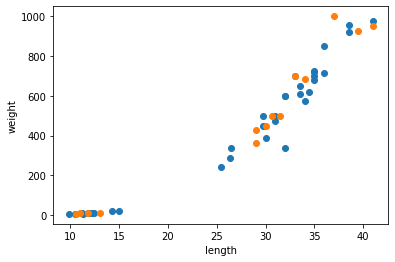

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn = kn.fit(train_input, train_target)

kn.score(test_input,test_target)

1.0